<a href="https://colab.research.google.com/github/Faycal214/Breast-cancer-prediction/blob/main/student_math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [3]:
# Read the data from the CSV file
df = pd.read_csv("/content/student_math_clean.csv")

In [4]:
df.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.columns

Index(['student_id', 'school', 'sex', 'age', 'address_type', 'family_size',
       'parent_status', 'mother_education', 'father_education', 'mother_job',
       'father_job', 'school_choice_reason', 'guardian', 'travel_time',
       'study_time', 'class_failures', 'school_support', 'family_support',
       'extra_paid_classes', 'activities', 'nursery_school', 'higher_ed',
       'internet_access', 'romantic_relationship', 'family_relationship',
       'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'grade_1', 'grade_2', 'final_grade'],
      dtype='object')

In [6]:
df.dtypes

student_id                int64
school                   object
sex                      object
age                       int64
address_type             object
family_size              object
parent_status            object
mother_education         object
father_education         object
mother_job               object
father_job               object
school_choice_reason     object
guardian                 object
travel_time              object
study_time               object
class_failures            int64
school_support           object
family_support           object
extra_paid_classes       object
activities               object
nursery_school           object
higher_ed                object
internet_access          object
romantic_relationship    object
family_relationship       int64
free_time                 int64
social                    int64
weekday_alcohol           int64
weekend_alcohol           int64
health                    int64
absences                  int64
grade_1 

In [7]:
df.shape

(395, 34)

In [8]:
df.isnull().sum()

student_id               0
school                   0
sex                      0
age                      0
address_type             0
family_size              0
parent_status            0
mother_education         0
father_education         0
mother_job               0
father_job               0
school_choice_reason     0
guardian                 0
travel_time              0
study_time               0
class_failures           0
school_support           0
family_support           0
extra_paid_classes       0
activities               0
nursery_school           0
higher_ed                0
internet_access          0
romantic_relationship    0
family_relationship      0
free_time                0
social                   0
weekday_alcohol          0
weekend_alcohol          0
health                   0
absences                 0
grade_1                  0
grade_2                  0
final_grade              0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes.value_counts()

object    21
int64     13
Name: count, dtype: int64

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [12]:
categorical_columns

Index(['school', 'sex', 'address_type', 'family_size', 'parent_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'school_choice_reason', 'guardian', 'travel_time', 'study_time',
       'school_support', 'family_support', 'extra_paid_classes', 'activities',
       'nursery_school', 'higher_ed', 'internet_access',
       'romantic_relationship'],
      dtype='object')

In [13]:
numerical_columns = df.select_dtypes(include= ["int64"]).columns
numerical_columns

Index(['student_id', 'age', 'class_failures', 'family_relationship',
       'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'grade_1', 'grade_2', 'final_grade'],
      dtype='object')

### explore categorical features

In [14]:
df1 = df[categorical_columns]

In [15]:
df1.head()

,school,sex,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_choice_reason,...,travel_time,study_time,school_support,family_support,extra_paid_classes,activities,nursery_school,higher_ed,internet_access,romantic_relationship
0,GP,F,Urban,Greater than 3,Apart,higher education,higher education,at_home,teacher,course,...,15 to 30 min.,2 to 5 hours,yes,no,no,no,yes,yes,no,no
1,GP,F,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,other,course,...,<15 min.,2 to 5 hours,no,yes,no,no,no,yes,yes,no
2,GP,F,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,other,other,...,<15 min.,2 to 5 hours,yes,no,yes,no,yes,yes,yes,no
3,GP,F,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,services,home,...,<15 min.,5 to 10 hours,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,Urban,Greater than 3,Living together,secondary education,secondary education,other,other,home,...,<15 min.,2 to 5 hours,no,yes,yes,no,yes,yes,no,no


In [16]:
df[categorical_columns].nunique()

school                   2
sex                      2
address_type             2
family_size              2
parent_status            2
mother_education         5
father_education         5
mother_job               5
father_job               5
school_choice_reason     4
guardian                 3
travel_time              4
study_time               4
school_support           2
family_support           2
extra_paid_classes       2
activities               2
nursery_school           2
higher_ed                2
internet_access          2
romantic_relationship    2
dtype: int64

In [17]:
df1.describe()

,school,sex,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_choice_reason,...,travel_time,study_time,school_support,family_support,extra_paid_classes,activities,nursery_school,higher_ed,internet_access,romantic_relationship
count,395,395,395,395,395,395,395,395,395,395,...,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,5,5,4,...,4,4,2,2,2,2,2,2,2,2
top,GP,F,Urban,Greater than 3,Living together,higher education,5th to 9th grade,other,other,course,...,<15 min.,2 to 5 hours,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,131,115,141,217,145,...,257,198,344,242,214,201,314,375,329,263


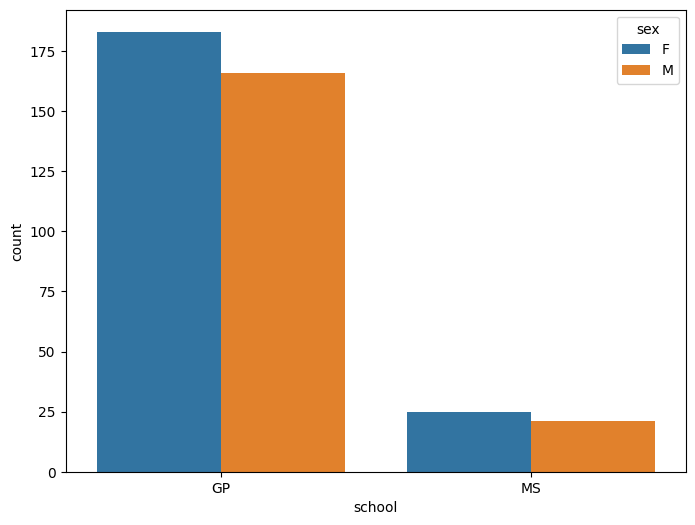

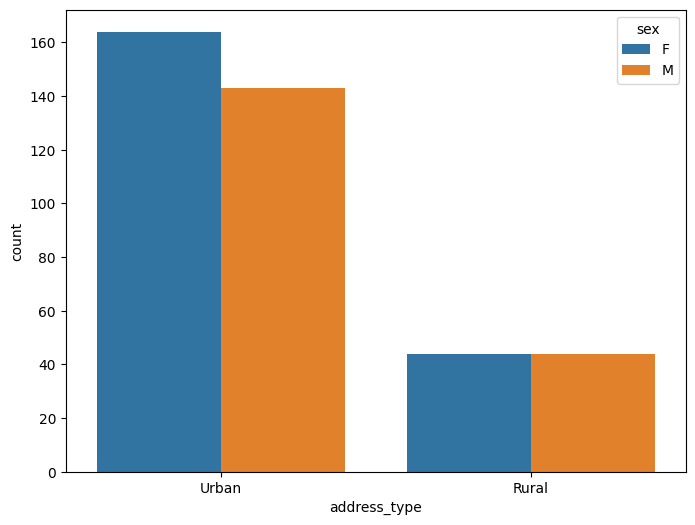

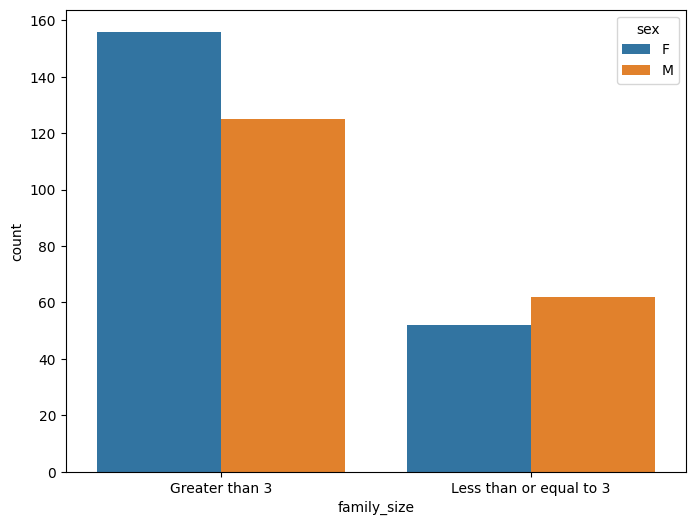

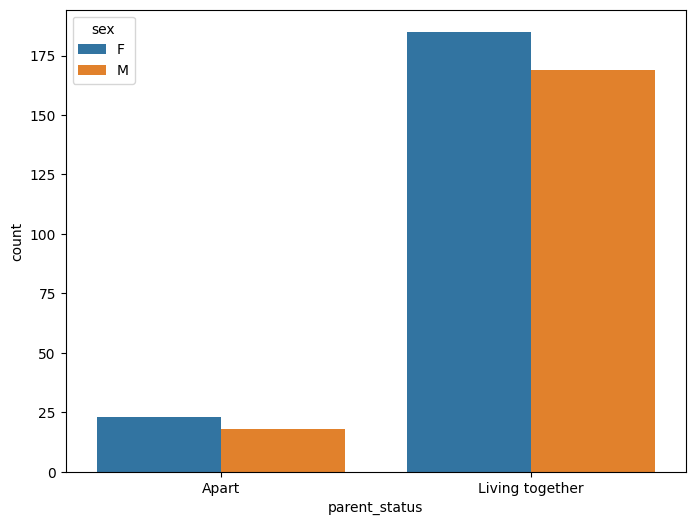

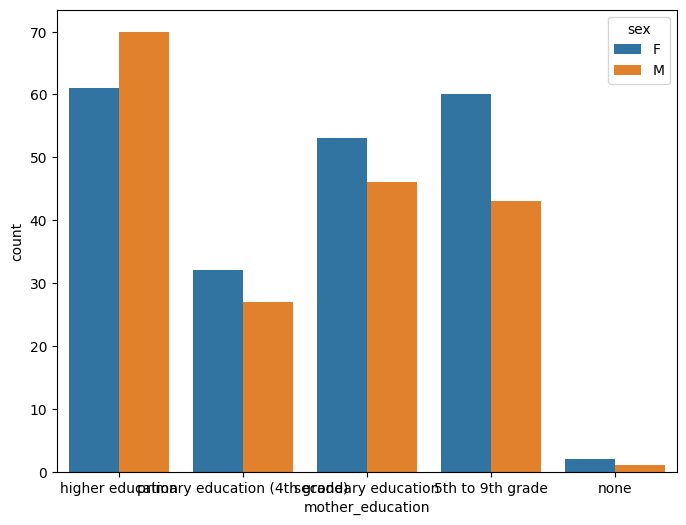

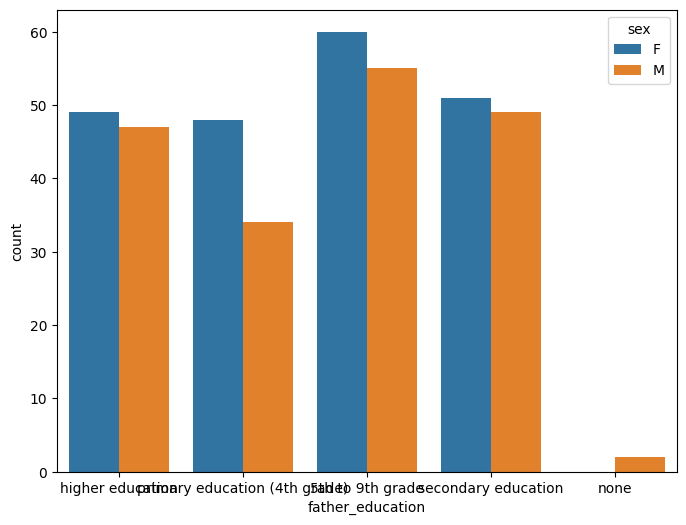

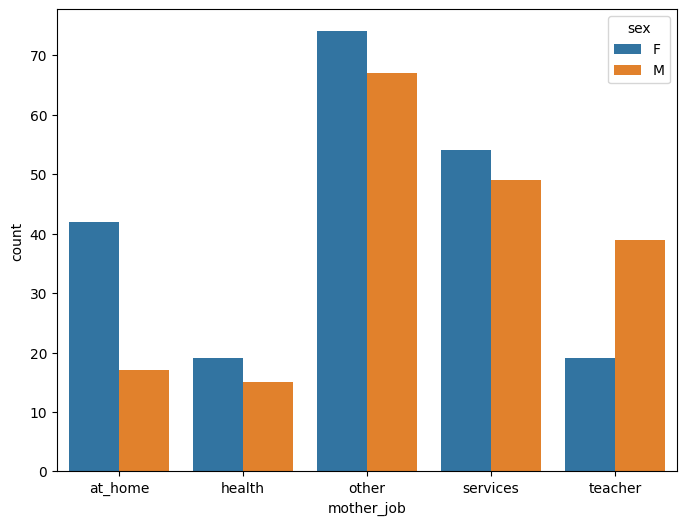

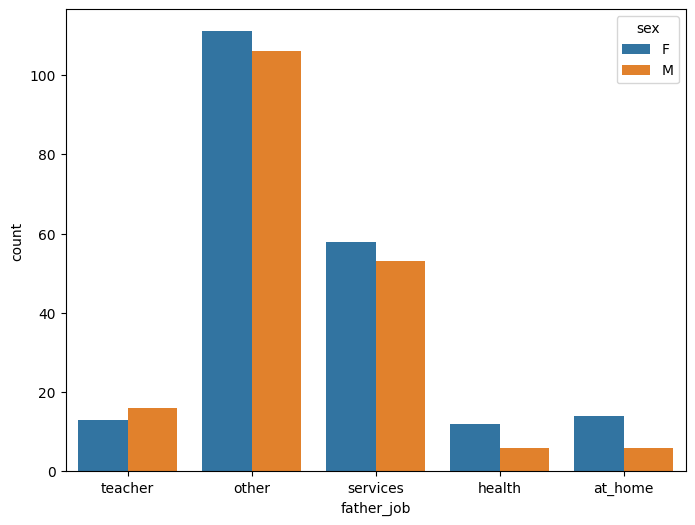

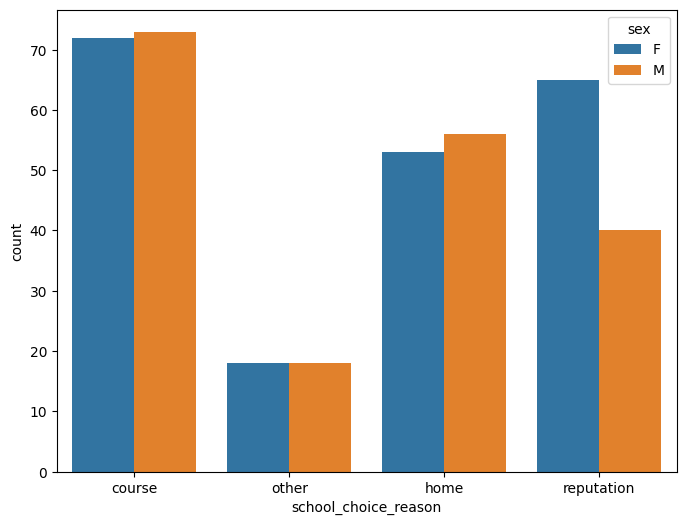

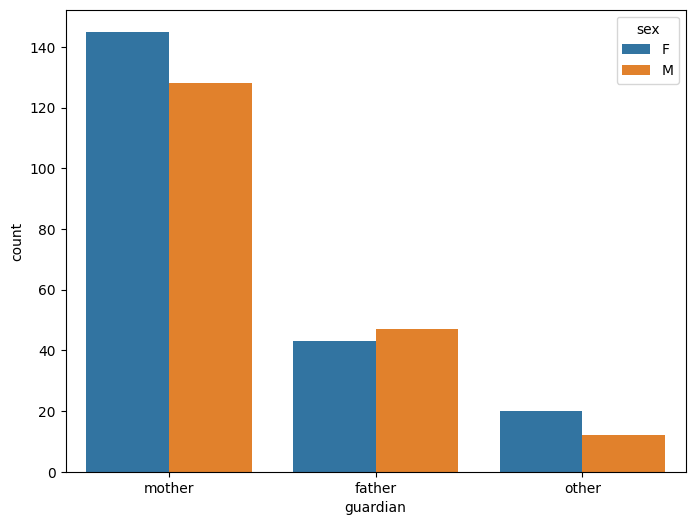

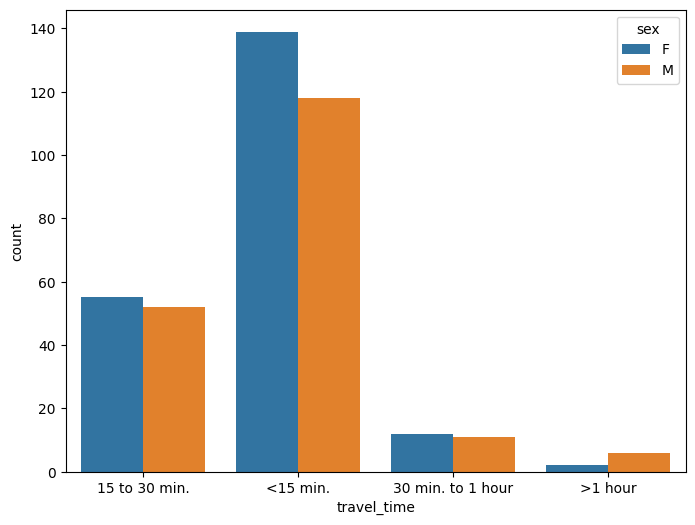

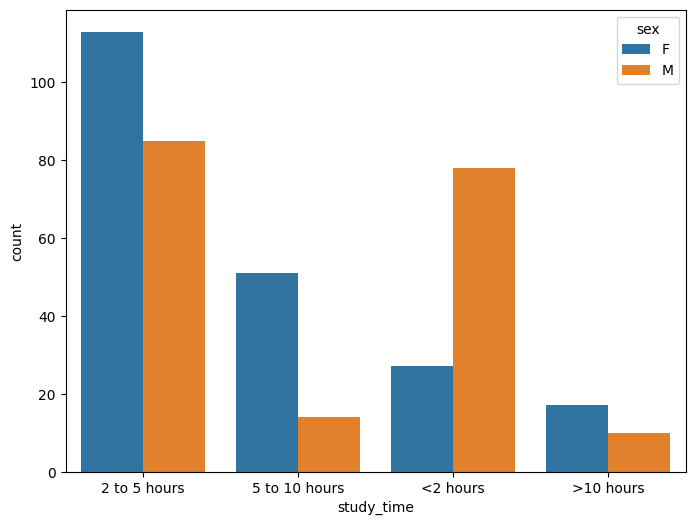

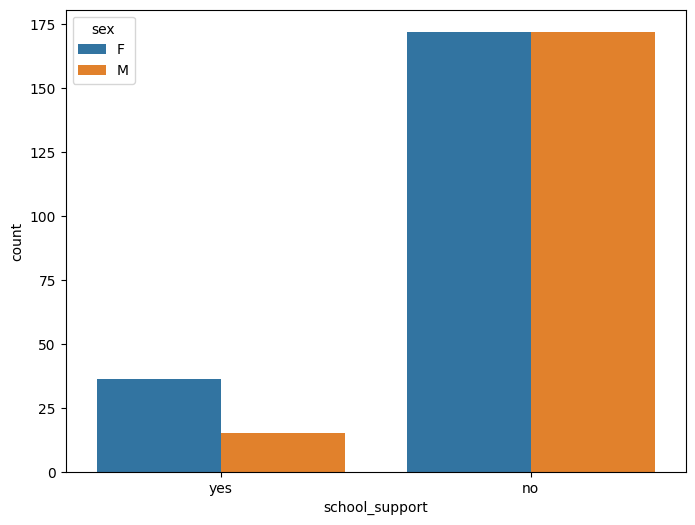

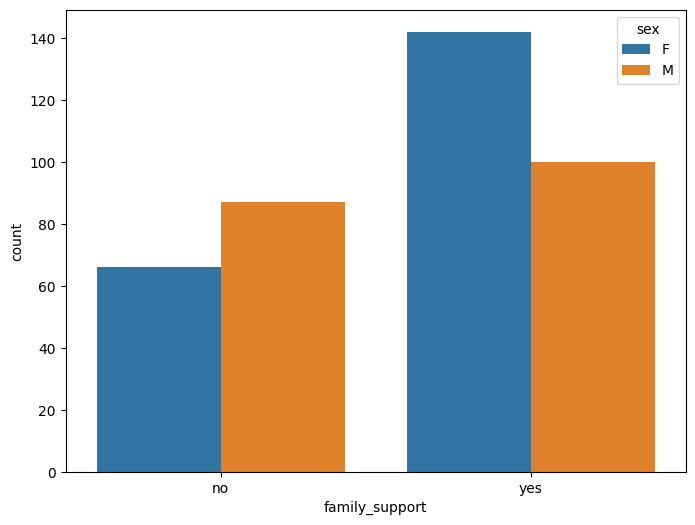

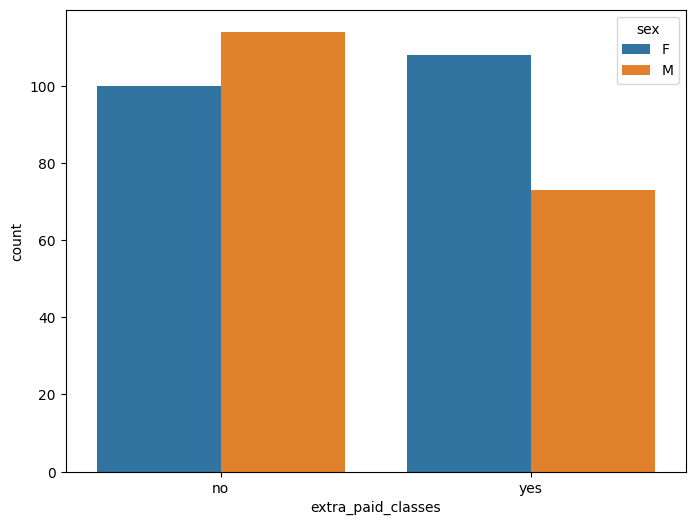

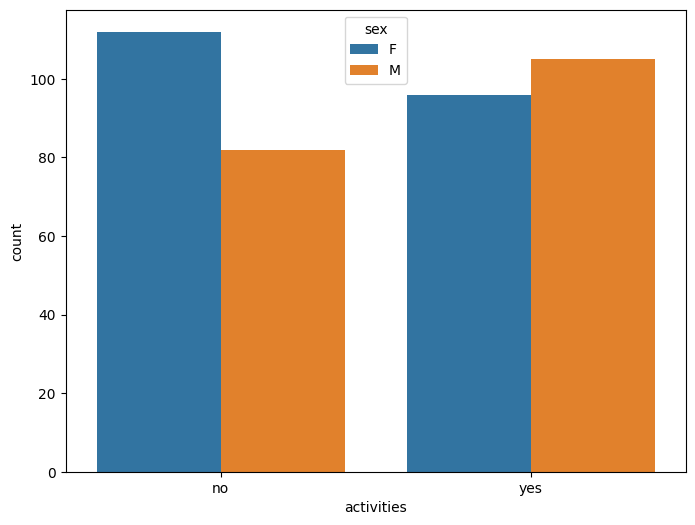

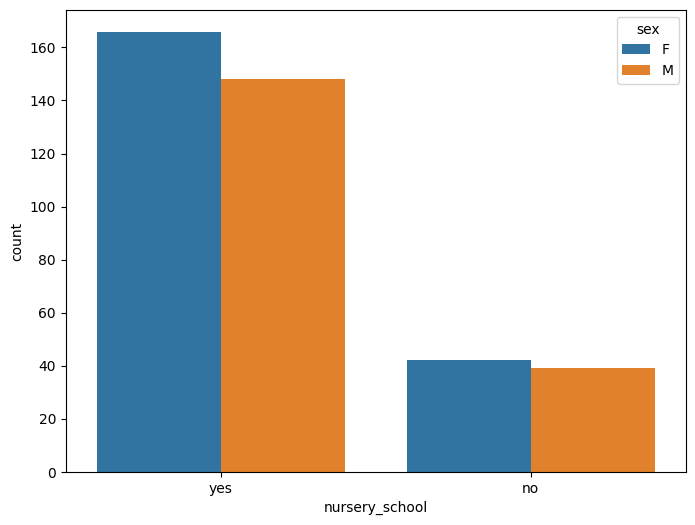

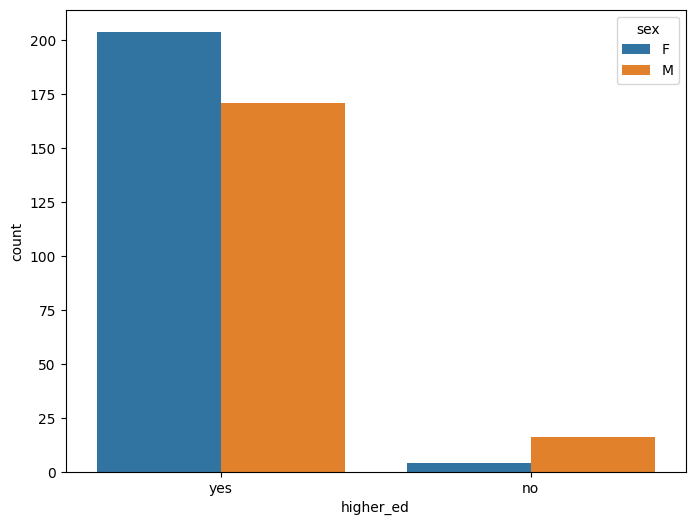

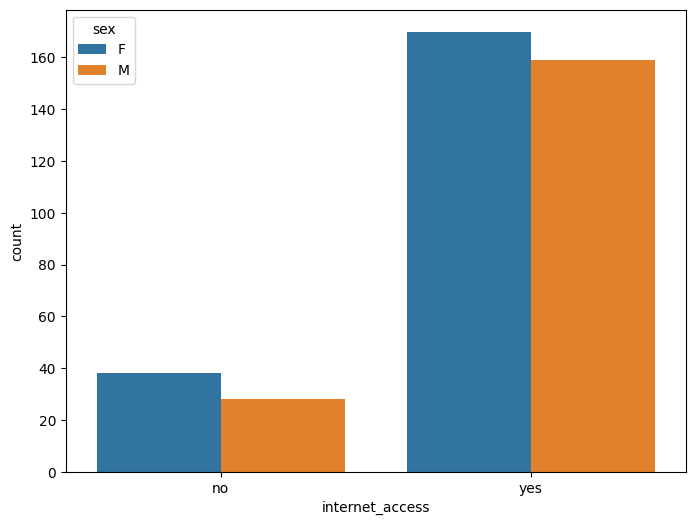

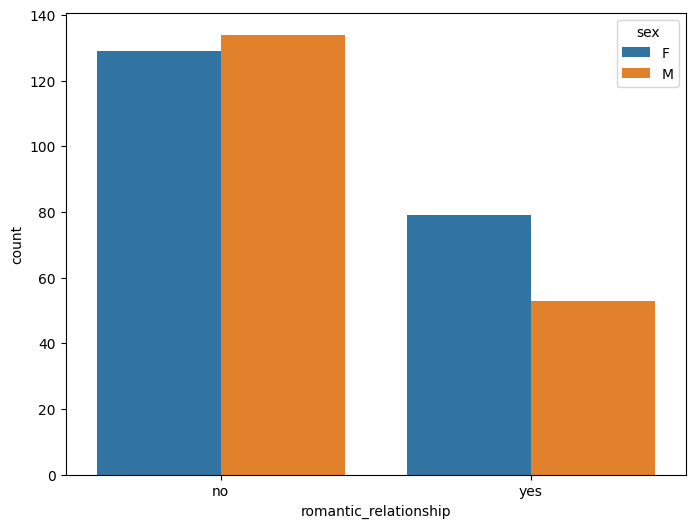

In [18]:
for col in categorical_columns :
  if col == 'sex' :
    continue
  else :
    plt.figure(figsize = (8, 6))
    sns.countplot(x = col, hue = 'sex', data = df1)
    plt.show()

In [19]:
label = LabelEncoder()
for col in categorical_columns :
  df1[col] = label.fit_transform(df1[col])
  print(df1[col].unique())
  print(df1[col].value_counts())

[0 1]
school
0    349
1     46
Name: count, dtype: int64
[0 1]
sex
0    208
1    187
Name: count, dtype: int64
[1 0]
address_type
1    307
0     88
Name: count, dtype: int64
[0 1]
family_size
0    281
1    114
Name: count, dtype: int64
[0 1]
parent_status
1    354
0     41
Name: count, dtype: int64
[1 3 4 0 2]
mother_education
1    131
0    103
4     99
3     59
2      3
Name: count, dtype: int64
[1 3 0 4 2]
father_education
0    115
4    100
1     96
3     82
2      2
Name: count, dtype: int64
[0 1 2 3 4]
mother_job
2    141
3    103
0     59
4     58
1     34
Name: count, dtype: int64
[4 2 3 1 0]
father_job
2    217
3    111
4     29
0     20
1     18
Name: count, dtype: int64
[0 2 1 3]
school_choice_reason
0    145
1    109
3    105
2     36
Name: count, dtype: int64
[1 0 2]
guardian
1    273
0     90
2     32
Name: count, dtype: int64
[0 2 1 3]
travel_time
2    257
0    107
1     23
3      8
Name: count, dtype: int64
[0 1 2 3]
study_time
0    198
2    105
1     65
3     27
Name: co

<ipython-input-19-43e4abdefc1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label.fit_transform(df1[col])
<ipython-input-19-43e4abdefc1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label.fit_transform(df1[col])
<ipython-input-19-43e4abdefc1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [20]:
df1.head()

,school,sex,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_choice_reason,...,travel_time,study_time,school_support,family_support,extra_paid_classes,activities,nursery_school,higher_ed,internet_access,romantic_relationship
0,0,0,1,0,0,1,1,0,4,0,...,0,0,1,0,0,0,1,1,0,0
1,0,0,1,0,1,3,3,0,2,0,...,2,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,3,3,0,2,2,...,2,0,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,0,1,3,1,...,2,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,4,4,2,2,1,...,2,0,0,1,1,0,1,1,0,0


### numerical features

In [21]:
df2 = df[numerical_columns]
df2.head()

,student_id,age,class_failures,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,18,0,4,3,4,1,1,3,6,5,6,6
1,2,17,0,5,3,3,1,1,3,4,5,5,6
2,3,15,3,4,3,2,2,3,3,10,7,8,10
3,4,15,0,3,2,2,1,1,5,2,15,14,15
4,5,16,0,4,3,2,1,2,5,4,6,10,10


In [22]:
df2.nunique()

student_id             395
age                      8
class_failures           4
family_relationship      5
free_time                5
social                   5
weekday_alcohol          5
weekend_alcohol          5
health                   5
absences                34
grade_1                 17
grade_2                 17
final_grade             18
dtype: int64

In [23]:
df2.describe()

,student_id,age,class_failures,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,114.170924,1.276043,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,99.500000,16.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,198.000000,17.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,296.500000,18.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,395.000000,22.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


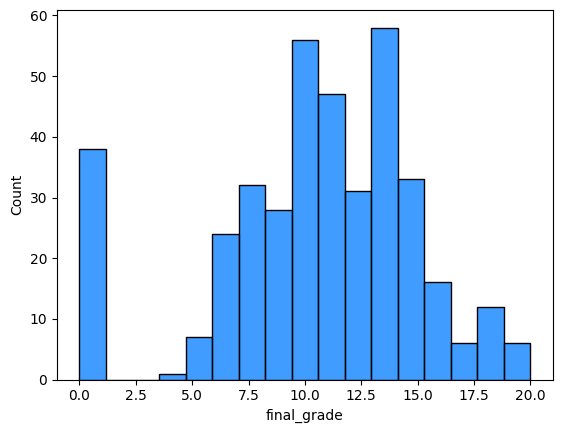

In [24]:
sns.histplot(data = df2, x= df2['final_grade'], bins= 17, color = '#007bff', fill= True)
plt.show()

In [25]:
data = pd.concat([df1, df2], axis= 1)
data

,school,sex,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_choice_reason,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,0,0,1,0,0,1,1,0,4,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,1,0,1,3,3,0,2,0,...,5,3,3,1,1,3,4,5,5,6
2,0,0,1,1,1,3,3,0,2,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,1,0,1,1,0,1,3,1,...,3,2,2,1,1,5,2,15,14,15
4,0,0,1,0,1,4,4,2,2,1,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,1,1,0,0,0,3,3,0,...,5,5,4,4,5,4,11,9,9,9
391,1,1,1,1,1,4,3,3,3,0,...,2,4,5,3,4,2,3,14,16,16
392,1,1,0,0,1,3,3,2,2,0,...,5,5,3,3,3,3,3,10,8,7
393,1,1,0,1,1,4,0,3,2,0,...,4,4,1,3,4,5,0,11,12,10


In [26]:
X = data.drop(columns = ['final_grade'])
Y = data['final_grade']

In [27]:
print(f"la taille de train set est : {X.shape}")

la taille de train set est : (395, 33)


### selection des features

In [28]:
X_new = SelectKBest(chi2, k= 10).fit_transform(X, Y)
X_new.shape

(395, 10)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size= 0.4, random_state= 42)

In [30]:
print(f"la taille de train set est : {x_train.shape}")
print(f"la taille de test set est : {x_test.shape}")

la taille de train set est : (237, 10)
la taille de test set est : (158, 10)


### creation des modeles

In [53]:
def train_model(model, x_train, y_train, x_test, y_test) :
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  score = model.score(x_test, y_test)
  MSE = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return score, MSE, r2

In [54]:
gbr = GradientBoostingRegressor()
gbr

GradientBoostingRegressor()

In [55]:
score_gbr, MSE_gbr, r2_gbr = train_model(gbr, x_train, y_train, x_test, y_test)
score_gbr, MSE_gbr, r2_gbr

(0.8835592208162839, 2.556552366387225, 0.8835592208162839)

In [47]:
rfr = RandomForestRegressor()
rfr

RandomForestRegressor()

In [48]:
score_rfr = train_model(rfr, x_train, y_train, x_test, y_test)
score_rfr

MSE : 2.4811506329113926
R2 : 0.8869934694994572


0.8869934694994572

In [50]:
dtr = DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

In [51]:
score_dtr = train_model(dtr, x_train, y_train, x_test, y_test)
score_dtr

MSE : 4.6455696202531644
R2 : 0.7884128041159997


0.7884128041159997

In [52]:
table = pd.DataFrame([score_gbr, score_rfr, score_dtr], index= ['GradientBoostingRegressor', 'RandomForestRegressor', 'DecisionTreeRegressor'], columns = ['score'])
table

,score
GradientBoostingRegressor,0.884045
RandomForestRegressor,0.886993
DecisionTreeRegressor,0.788413


### neural network

In [56]:
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile(
    loss=keras.losses.mean_squared_error,
    optimizer='adam',
    metrics=['mean_absolute_error', 'root_mean_squared_error']
)

In [69]:
model.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [59]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 108.3988


108.39875793457031

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
